In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv("Raw_Housing_Prices3.csv")

In [4]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [5]:
label_encoded = data['Condition of the House']
label_encoded.value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

In [6]:
label_encoded = label_encoded.map({'Bad' : 1,
                                  'Okay' : 2,
                                  'Fair' : 3,
                                  'Good' : 4,
                                  'Excellent' : 5})
label_encoded.value_counts()

3    14028
4     5678
5     1701
2      172
1       30
Name: Condition of the House, dtype: int64

# Binning

In [7]:
#Sparse Binning
data['Condition of the House'].unique()

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

In [8]:
data['Condition of the House'].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

In [10]:
mean = []
for i in data['Condition of the House'].unique():
    mean.append(data['Sale Price'][data['Condition of the House'] == i].mean())

Text(0, 0.5, 'Mean Sale Price')

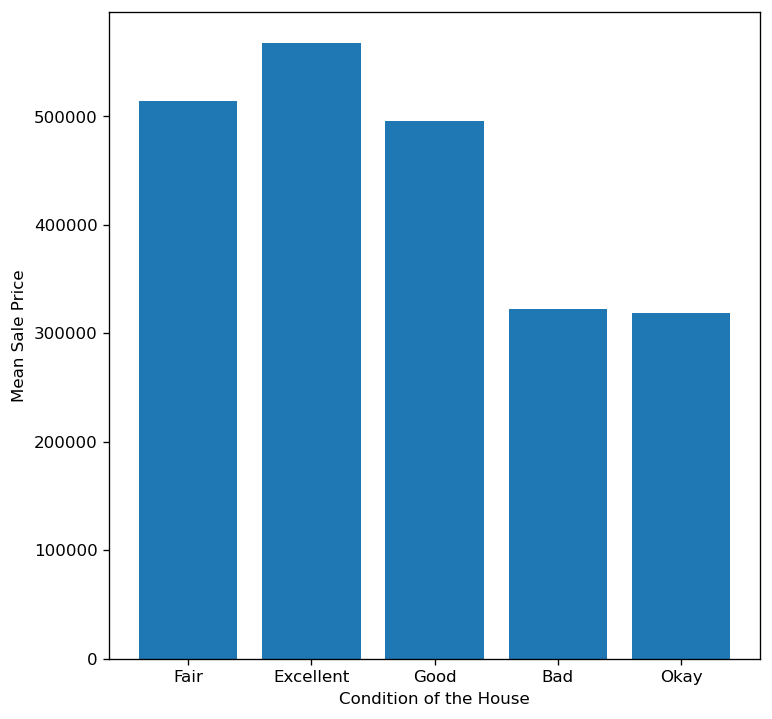

In [11]:
plt.figure(figsize = (7,7), dpi = 120)
plt.bar(data['Condition of the House'].unique(), mean)
plt.xlabel('Condition of the House')
plt.ylabel('Mean Sale Price')

In [12]:
mapping = {'Excellent' : 'Excellent',
          'Fair' : 'Good',
          'Good' : 'Good',
          'Okay' : 'Okay',
          'Bad' : 'Okay'}
data['Condition of the House'] = data['Condition of the House'].map(mapping)

In [13]:
mean = []
for i in data['Condition of the House'].unique():
    mean.append(data['Sale Price'][data['Condition of the House'] == i].mean())

Text(0, 0.5, 'Mean Sale Price')

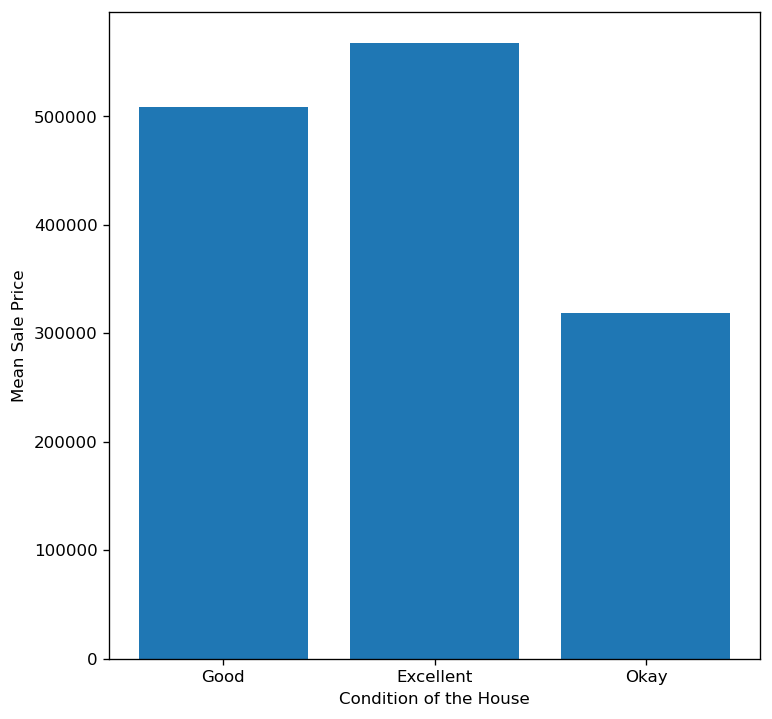

In [14]:
plt.figure(figsize = (7,7), dpi = 120)
plt.bar(data['Condition of the House'].unique(), mean)
plt.xlabel('Condition of the House')
plt.ylabel('Mean Sale Price')

In [16]:
len(data['Age of House (in Years)'].unique())

116

In [18]:
data['Age of House (in Years)'].max()

118

In [19]:
data['Age of House (in Years)'].min()

3

In [20]:
def age_of_house(x):
    if x < 10:
        x = 'new'
    elif x < 50:
        x = 'old'
    else:
        x = 'very old'
    return x   

In [22]:
cat_house_age = data['Age of House (in Years)'].map(age_of_house)
cat_house_age.unique()

array(['very old', 'old', 'new'], dtype=object)

# Feature Extraction

In [23]:
data['Date House was Sold'].head()

0     14 October 2017
1    14 December 2017
2    15 February 2016
3    14 December 2017
4    15 February 2016
Name: Date House was Sold, dtype: object

In [30]:
time = pd.DatetimeIndex(data['Date House was Sold'])

data['year_sold'] = time.year
data['month_sold'] = time.month
data['weekday_sold'] = time.day_name()
data['date_sold'] = time.days_in_month

data[['year_sold', 'month_sold', 'weekday_sold', 'date_sold']].head()

,year_sold,month_sold,weekday_sold,date_sold
0,2017,10,Saturday,31
1,2017,12,Thursday,31
2,2016,2,Monday,29
3,2017,12,Thursday,31
4,2016,2,Monday,29
